In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn as sk

3. KEŞİFSEL VERİ ANALİZİ

In [2]:
data_orj=pd.read_csv('insurance.csv')
df= data_orj.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Bmi(Vücut Kitle İndeksi)’nin dağılımını inceleyiniz

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


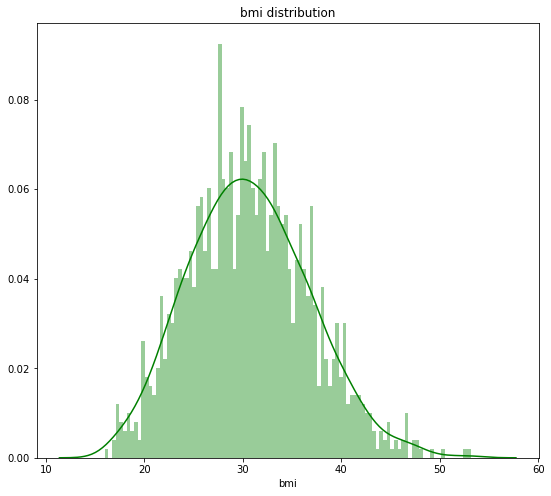

In [5]:
print(df['bmi'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['bmi'], color='g', bins=100).set(title='bmi distribution');

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

df['smoker'] = label_encoder.fit_transform(df['smoker']) 
df['region']=label_encoder.fit_transform(df['region'])
df['sex']=label_encoder.fit_transform(df['sex'])

In [7]:
df.corr()


,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


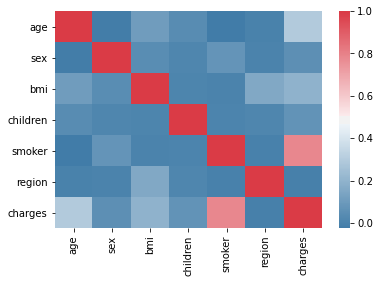

In [8]:
sns.heatmap(df.corr(),cmap=sns.diverging_palette(240,10,as_cmap=True));

Korelasyon katsayısı (r) nın yorumu;

r<0.2 ise çok zayıf ilişki yada korelasyon yok

0.2-0.4 arasında ise zayıf korelasyon

0.4-0.6 arasında ise orta şiddette korelasyon

0.6-0.8 arasında ise yüksek korelasyon

0.8> ise çok yüksek korelasyon olduğu yorumu yapılır. 

In [9]:
df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

In [ ]:
Charges ile smoker arasında yüksek bir korelasyon olduğu görülüyor.

○ “smoker” ile “charges” arasındaki ilişkiyi inceleyiniz

In [10]:
df['charges'].groupby(df['smoker']).mean()

smoker
0     8434.268298
1    32050.231832
Name: charges, dtype: float64

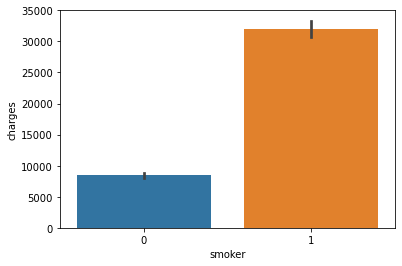

In [11]:
sns.barplot(x="smoker",y="charges",data=df);

In [10]:
df[['smoker', 'charges']].corr()

,smoker,charges
smoker,1.000000,0.787251
charges,0.787251,1.000000


smoker ile charges arasında yüksek bir korelasyon (0.6-0.8) vardır 

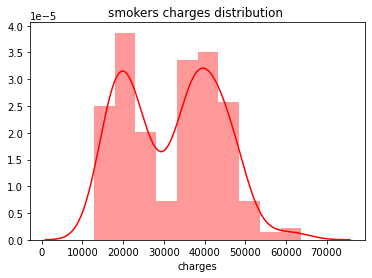

In [14]:
sns.distplot(data_orj[(data_orj["smoker"] == "yes")]["charges"],color='r', bins=10).set(title='smokers charges distribution ');
                        

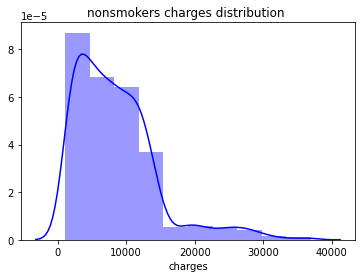

In [16]:
sns.distplot(data_orj[(data_orj["smoker"] == "no")]["charges"],color='b', bins=10).set(title='nonsmokers charges distribution ');

○ “smoker” (Sigara tüketen) ile “region”(Bölge) arasındaki ilişkiyi inceleyiniz.

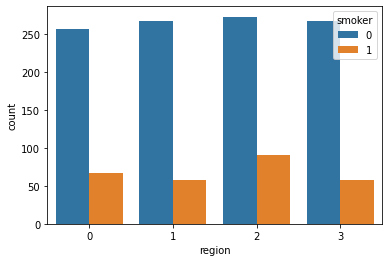

In [17]:
sns.countplot(x="region", hue="smoker", data=df);

○ “bmi” ile “sex”(Cinsiyet) arasındaki ilişkiyi inceleyiniz.

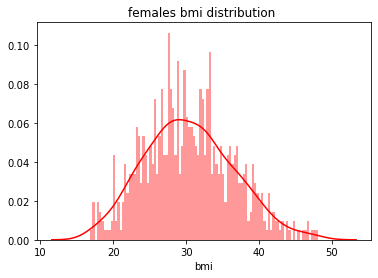

In [172]:
sns.distplot(data_orj[(data_orj["sex"] == "female")]["bmi"],color='r', bins=100).set(title='females bmi distribution ');

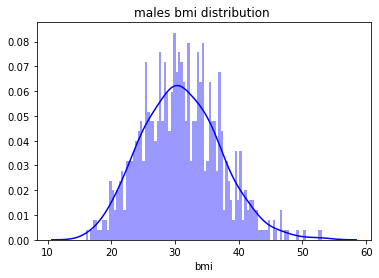

In [173]:
sns.distplot(data_orj[(data_orj["sex"] == "male")]["bmi"],color='b', bins=100).set(title='males bmi distribution ');

In [ ]:
○ En çok “children”’a sahip “region”’ı bulunuz.

In [25]:
max_child_id=data_orj[['children']].idxmax()

In [26]:
data_orj['region'].iloc[max_child_id]

32    southwest
Name: region, dtype: object

In [ ]:
○ “Age” ile “bmi” arasındaki ilişkiyi inceleyiniz.

In [27]:
df['age'].corr(df['bmi'])

0.1092718815485352

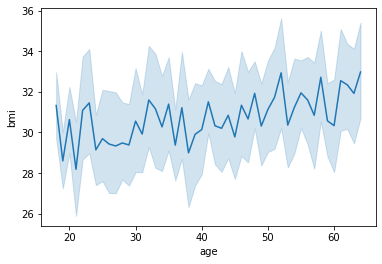

In [20]:
sns.lineplot(x="age", y="bmi", data=df);

○ “bmi” değişkeninde outlier var mıdır? İnceleyiniz.

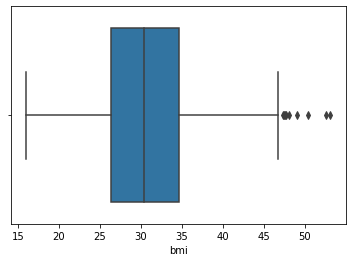

In [21]:
sns.boxplot(df['bmi']);

In [ ]:
bmi değişkeninde 46 dan sonrası outlierdır diyebiliriz

In [ ]:
○ “bmi” ile “children” arasındaki ilişkiyi inceleyiniz.

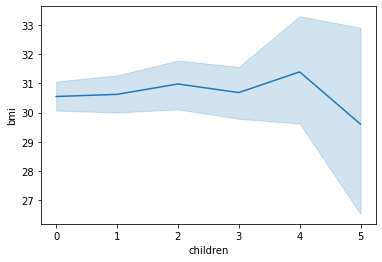

In [22]:
sns.lineplot(x = "children", y = "bmi", data=df);

In [ ]:
Çocuk sayısı 4 ten 5 e çıkınca BMI düşmüştür

In [ ]:
○ “bmi” ile “charges” arasındaki ilişkiyi inceleyiniz.


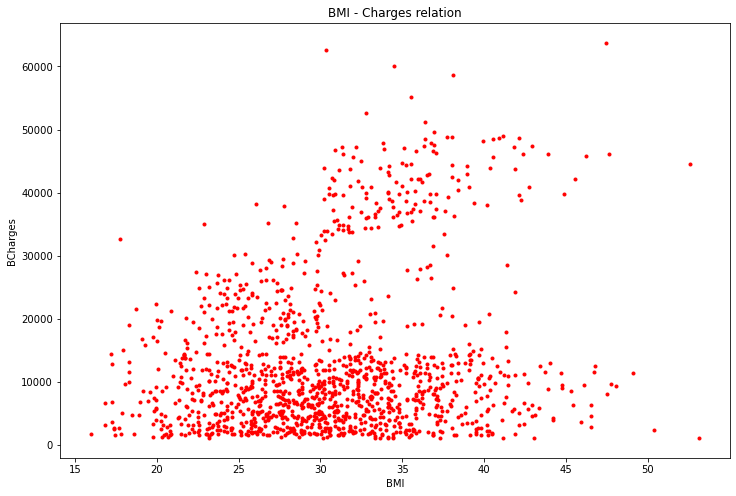

In [23]:
plt.figure(figsize=(12, 8))

plt.xlabel('BMI')
plt.ylabel('BCharges')
plt.title("BMI - Charges relation")
plt.scatter(df['bmi'],df['charges'], marker=".", color='red')
plt.show()

In [24]:
df['bmi'].corr(df['charges'])

0.1983409688336289

BMI ile Charges arasında zayıf bir korelasyon (0.2-0.4 arasında) vardır .

In [ ]:
○ “region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceleyiniz.

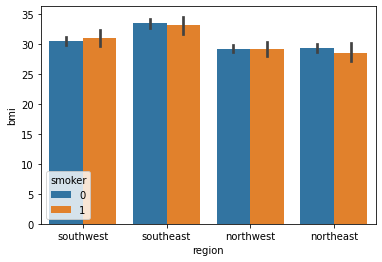

In [25]:
sns.barplot(x = data_orj["region"], y = "bmi", hue = "smoker", data=df);

4. VERİ ÖNİŞLEME

In [29]:
from sklearn.model_selection import train_test_split

In [55]:
# veriyi önce bölüp sonra normalize etmektense önce normalize ettim
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)

normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

print(normalized_df)

           age  sex       bmi  children  smoker    region   charges
0     0.021739  0.0  0.321227       0.0     1.0  1.000000  0.251611
1     0.000000  1.0  0.479150       0.2     0.0  0.666667  0.009636
2     0.217391  1.0  0.458434       0.6     0.0  0.666667  0.053115
3     0.326087  1.0  0.181464       0.0     0.0  0.333333  0.333010
4     0.304348  1.0  0.347592       0.0     0.0  0.333333  0.043816
...        ...  ...       ...       ...     ...       ...       ...
1333  0.695652  1.0  0.403820       0.6     0.0  0.333333  0.151299
1334  0.000000  0.0  0.429379       0.0     0.0  0.000000  0.017305
1335  0.000000  0.0  0.562012       0.0     0.0  0.666667  0.008108
1336  0.065217  0.0  0.264730       0.0     0.0  1.000000  0.014144
1337  0.934783  0.0  0.352704       0.0     1.0  0.333333  0.447249

[1338 rows x 7 columns]


In [37]:
#veriyi %70 eğitim, % 30 test olacak şekilde bölüyoruz
train, test = train_test_split(normalized_df, test_size=0.3) 

In [46]:
# label 'charges' olacak şekilde veriyi ayrıştırıyoruz
X_train = train.drop("charges",axis=1)
y_train = train.loc[:,"charges"]

X_test = test.drop("charges",axis=1)
y_test = test.loc[:,"charges"]

5. MODEL SEÇME

In [71]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error

In [60]:
model1 = LinearRegression()

In [61]:
model1.fit(X_train,y_train)


LinearRegression()

In [76]:
linear_pred = model1.predict(X_test)

In [77]:
rmse = np.sqrt(mean_squared_error(y_test, linear_pred))
rmse

6112.7471826160445

In [78]:
comparison = pd.DataFrame({"Actual Values": y_test,"Predictions": linear_pred})

In [79]:
comparison.head()

,Actual Values,Predictions
15,1837.23700,-94.390027
119,6686.43130,5972.779053
1033,13747.87235,22778.940554
839,12622.17950,13442.637829
881,2789.05740,2611.011526


In [72]:
model2=Ridge(alpha=0.05, normalize=True)

In [73]:
model2.fit(X_train,y_train)

Ridge(alpha=0.05, normalize=True)

In [82]:
ridge_pred = model2.predict(X_test)

In [83]:
linear_mse = mean_squared_error(y_test, linear_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

In [84]:
print(f"MSE without Ridge: {linear_mse}")
print(f"MSE with Ridge : {ridge_mse}")

MSE without Ridge: 37365678.11858039
MSE with Ridge : 37871541.99347764


In [85]:
!!! Ridge nin daha iyi sonuç vermesi gerekirdi, belki alpha hatalı 

-505863.87489724904